In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")


clinical_trial_data["Mouse ID"].count()


1893

In [2]:
# Combine the data into a single dataset
##### combined data is showing more lines than table clinical_trial_data
#####combined_data=clinical_trial_data.merge(mouse_drug_data, how='right', on='Mouse ID', validate= 'many_to_one')

combined_data=clinical_trial_data.merge(mouse_drug_data, how='right', on='Mouse ID')

combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [3]:
combined_data["Mouse ID"].count()

1906

## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_combined_data=combined_data.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
TV_group_combined_data_mean=pd.DataFrame(group_combined_data["Tumor Volume (mm3)"].mean())

# Preview DataFrame
TV_group_combined_data_mean.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
TV_group_combined_data_sem=pd.DataFrame(group_combined_data["Tumor Volume (mm3)"].sem())

# Preview DataFrame

TV_group_combined_data_sem.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [10]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

formated_mean_unstack=TV_group_combined_data_mean.unstack(0)
formated_mean_unstack

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [11]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

formated_sem_unstack=TV_group_combined_data_sem.unstack(0)
formated_sem_unstack

Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.448593  0.164505  0.235102  0.264819  0.202385   
10                  0.702684  0.236144  0.282346  0.357421  0.319415   
15                  0.838617  0.332053  0.357705  0.580268  0.444378   
20                  0.909731  0.359482  0.476210  0.726484  0.595260   
25                  0.881642  0.439356  0.550315  0.755413  0.813706   
30                  0.934460  0.490620  0.631061  0.934121  0.975496   
35                  1.052241  0.692248  0.984155  1.127867  1.013769   
40                  1.223608  0.708505  1.055220  1.158449  1.118567   
45                  1.223977  0.902358  1.144427  1.453186  1.416363   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.839609  0.555181  0.786199  0.621889  0.533182  
25         1.034872  0.577401  0.746991  0.741922  0.602513  
30         1.218231  0.746045  0.864906  0.899548  0.800043  
35         1.287481  1.084929  0.967433  1.003186  0.881426  
40         1.370634  1.564779  1.128445  1.410435  0.998515  
45         1.351726  1.888586  1.226805  1.576556  1.003576

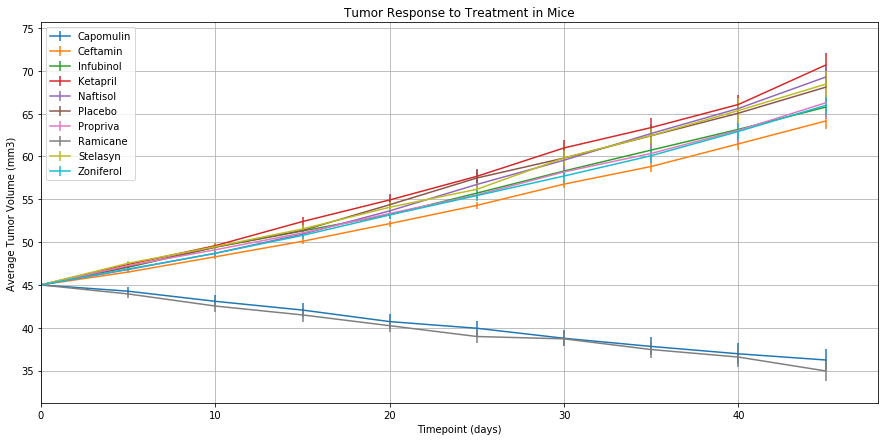

In [28]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize=(15,7))
formated_mean_unstack.plot(yerr=formated_sem_unstack, ax=ax)
plt.title("Tumor Response to Treatment in Mice")
plt.xlabel ("Timepoint (days)")
plt.ylabel ("Average Tumor Volume (mm3)")

ax.legend(["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], loc="best")
plt.xlim(0,48)
plt.ylim(min(formated_mean_unstack["Tumor Volume (mm3)"]["Capomulin"]-5),
         max(formated_mean_unstack["Tumor Volume (mm3)"]["Ketapril"]+5))

# Add in a grid for the chart
plt.grid()

# Save the Figure
plt.savefig("tumor_response_treatment.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [21]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
MS_group_combined_data_mean=pd.DataFrame(group_combined_data["Metastatic Sites"].mean())

# Preview DataFrame
MS_group_combined_data_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [22]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame
MS_group_combined_data_sem=pd.DataFrame(group_combined_data["Metastatic Sites"].sem())

# Preview DataFrame

MS_group_combined_data_sem.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [23]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
MS_formated_mean_unstack=MS_group_combined_data_mean.unstack(0)
MS_formated_mean_unstack

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

In [24]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
MS_formated_sem_unstack=MS_group_combined_data_sem.unstack(0)
MS_formated_sem_unstack

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   
25                0.181818  0.258831  0.265753  0.288275  0.185240  0.263888   
30                0.172944  0.249479  0.227823  0.347467  0.266667  0.300264   
35                0.169496  0.266526  0.224733  0.361418  0.330464  0.341412   
40                0.175610  0.289128  0.314466  0.315725  0.321702  0.297294   
45                0.202591  0.286101  0.309320  0.278722  0.351104  0.304240   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378  
25         0.199095  0.119430  0.219824  0.236621  
30         0.266469  0.139968  0.230641  0.248168  
35         0.366667  0.145997  0.240983  0.285714  
40         0.433903  0.160591  0.312815  0.299791  
45         0.428571  0.190221  0.359062  0.286400

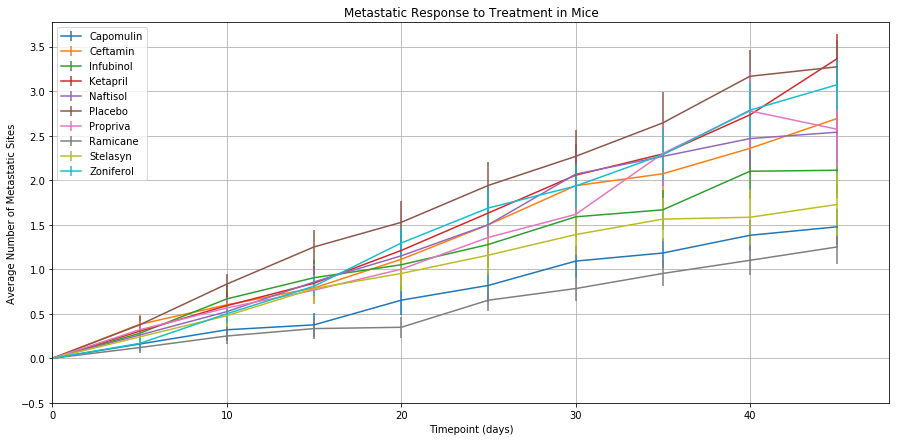

In [39]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize=(15,7))
MS_formated_mean_unstack.plot(yerr=MS_formated_sem_unstack, ax=ax)
plt.title("Metastatic Response to Treatment in Mice")
plt.xlabel ("Timepoint (days)")
plt.ylabel ("Average Number of Metastatic Sites")

ax.legend(["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], loc="best")
plt.xlim(0,48)
plt.ylim(min(MS_formated_mean_unstack["Metastatic Sites"]["Ramicane"])-0.5,
         max(MS_formated_mean_unstack["Metastatic Sites"]["Placebo"])+0.5)

# Add in a grid for the chart
plt.grid()

# Save the Figure
plt.savefig("number_metastatic_sites.png")

# Show the Figure
plt.show()

## Survival Rates

In [142]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
SR_group_combined_data_count=pd.DataFrame(group_combined_data["Mouse ID"].count())

# Preview DataFrame
SR_group_combined_data_count


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
          25               22
          30               22
          35               22
          40               21
          45               21
Ceftamin  0                25
          5                21
          10               20
          15               19
          20               18
          25               18
          30               16
          35               14
          40               14
          45               13
Infubinol 0                25
          5                25
          10               21
          15               21
          20               20
          25               18
          30               17
          35               12
          40               10
          45                9
...                       ...
Ramicane  0                25
          5                25
          10               24
          15               24
          20               23
          25               23
          30               23
          35               21
          40               20
          45               20
Stelasyn  0                26
          5                25
          10               23
          15               23
          20               21
          25               19
          30               18
          35               16
          40               12
          45               11
Zoniferol 0                25
          5                24
          10               22
          15               21
          20               17
          25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [ ]:
drug_list=combined_data["Drug"].unique()

In [160]:
drug_dict={}
for drug in drug_list:
    df=SR_group_combined_data_count.loc[drug]
    initial=df["Mouse ID"][0]
    drug_dict[str(drug)] = df["Mouse ID"]/initial

df=pd.DataFrame(drug_dict)

df
    #percentage = lambda x: round((x/initial, 2))
    #print(percentage)
    #df.apply(percentage)
    

,Capomulin,Ketapril,Naftisol,Infubinol,Stelasyn,Ramicane,Propriva,Zoniferol,Placebo,Ceftamin
Timepoint,,,,,,,,,,
0,1.00,1.00,1.00,1.00,1.000000,1.00,1.000000,1.00,1.00,1.00
5,1.00,0.92,0.92,1.00,0.961538,1.00,0.961538,0.96,0.96,0.84
10,1.00,0.88,0.84,0.84,0.884615,0.96,0.884615,0.88,0.96,0.80
15,0.96,0.76,0.84,0.84,0.884615,0.96,0.653846,0.84,0.80,0.76
20,0.92,0.76,0.80,0.80,0.807692,0.92,0.653846,0.68,0.76,0.72
25,0.88,0.76,0.72,0.72,0.730769,0.92,0.538462,0.64,0.68,0.72
30,0.88,0.72,0.60,0.68,0.692308,0.92,0.500000,0.60,0.60,0.64
35,0.88,0.68,0.60,0.48,0.615385,0.84,0.384615,0.56,0.56,0.56
40,0.84,0.60,0.60,0.40,0.461538,0.80,0.346154,0.56,0.48,0.56


In [129]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
#SR_count_unstack=SR_group_combined_data_count.unstack(0)
#tr_df = SR_count_unstack.transpose()
#tr_df.head()

#tr_df['5'].head()

In [118]:
##########TRYING TO CALCULATE PERCENATGES WITHIN THE DATAFRAME
####percentage = lambda x: round((x/25), 2)
####SR_count_unstack_percentage=SR_count_unstack.applymap(percentage)

###############TRYING TO CALCULATE PERCENATGES WITHIN THE DATAFRAME 2
#SR_count_unstack_percentage 
#drug_list=["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
#n_initial=[]
#for index in drug_list:
#    list.append(SR_count_unstack["Mouse ID"][index][0])

#for index in drug_list:
#    initial=SR_count_unstack["Mouse ID"][index][0]
#    percentage = lambda x: round((x/initial, 2)
#    SR_count_unstack["Mouse ID"][index].map(percentage)

        

In [123]:
drugs=SR_count_unstack.columns




pandas.core.indexes.multi.MultiIndex

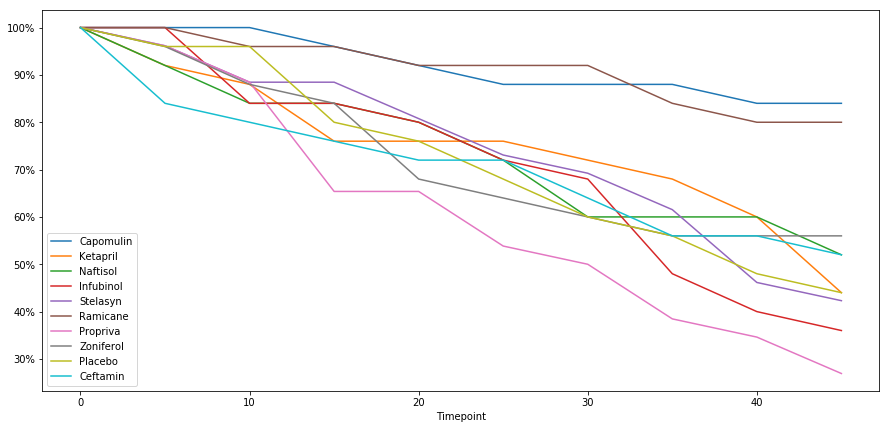

In [161]:
from matplotlib.ticker import PercentFormatter
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots(figsize=(15,7))
df.plot(ax=ax)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
# Save the Figure

# Show the Figure
plt.show()

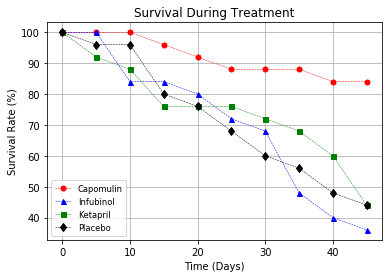

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

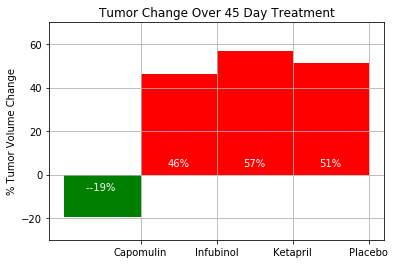